# Exploratory Data Analysis and Data Cleaning

1. **Loading Data**
    * Loading data into a dataframe
    * Percentage of missing values
    * Structure and format of the data

2. **Data Cleaning**
    * Working on variables with missing values above a threshold
    * Combining data
    * Correcting data types
    * Outlier Removal
    * Structure and format of the data
                  
3. **Data Visualization**
    * General Distribution
    * Variables of interest

# 0. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [2]:
%matplotlib inline 
sns.set(color_codes=True)
pd.set_option('display.max_columns', 100)

# 1. Loading Data

#### Load data into dataframe

In [3]:
training_data = pd.read_csv('ml_case_training_data.csv')
training_data.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


In [4]:
pd.DataFrame({"Missing values (%)":round(training_data.isnull().sum()/len(training_data), 2)})

,Missing values (%)
id,0.00
activity_new,0.59
campaign_disc_ele,1.00
channel_sales,0.26
cons_12m,0.00
cons_gas_12m,0.00
cons_last_month,0.00
date_activ,0.00
date_end,0.00
date_first_activ,0.78


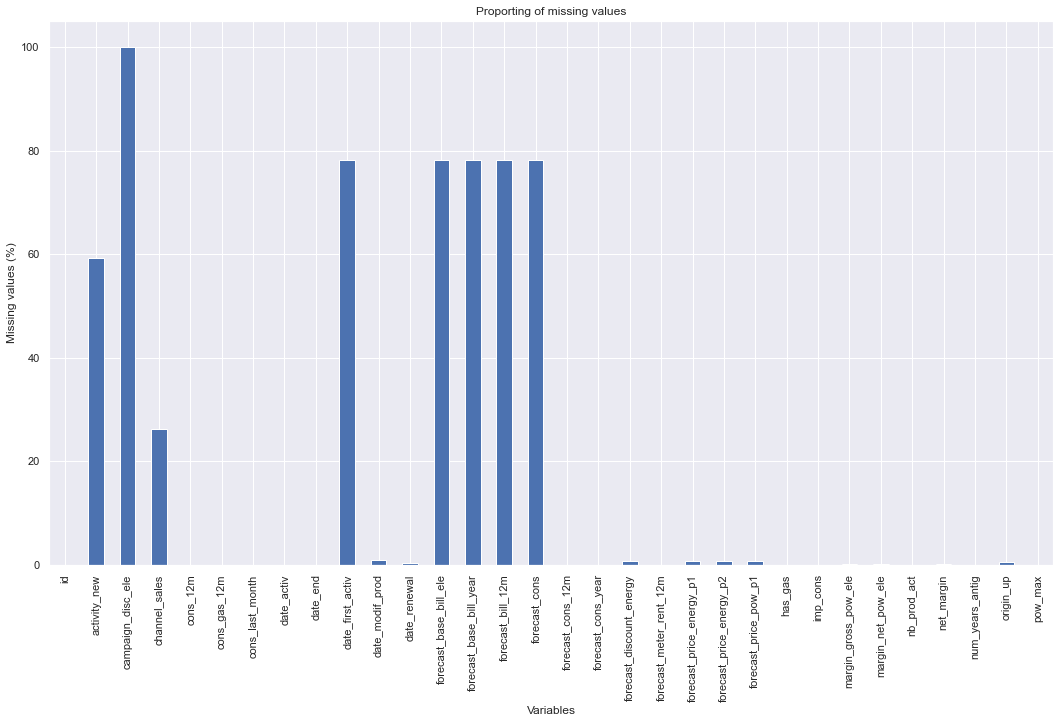

In [5]:
# Plot missing data
(training_data.isnull().sum()/len(training_data.index)*100).plot(kind="bar", figsize=(18,10)) # Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.title("Proporting of missing values")
plt.show()

In [6]:
training_hist = pd.read_csv('ml_case_training_hist_data.csv')
training_hist.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [7]:
pd.DataFrame({"Missing values (%)":round(training_hist.isnull().sum()/len(training_hist), 2)})

,Missing values (%)
id,0.00
price_date,0.00
price_p1_var,0.01
price_p2_var,0.01
price_p3_var,0.01
price_p1_fix,0.01
price_p2_fix,0.01
price_p3_fix,0.01


In [8]:
training_output = pd.read_csv('ml_case_training_output.csv')
training_output.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


In [9]:
pd.DataFrame({"Missing values (%)":round(training_output.isnull().sum()/len(training_output), 2)})

,Missing values (%)
id,0.0
churn,0.0


# 2. Data Cleaning
#### Method for dropping missing values:
Since some of the data contains a lot of missing values and this will have a significant impact on the model performance, we need to set a threshold for the proportion of missing values.
For this analysis i used 30%, we will remove the variables with more than 30% of the values missing.

1. 8 variables were dropped from the training data and we now have 24 variables remaining.
2. No variables were dropped from the historical and churn data as they do not contain missing values above 30%.

#### Method for replacing missing values:
1. For numerical variables, missing values were replaced by the median

2. For categorical variables, missing values were replaced by the mode (most frequent categories)

In [10]:
def check_missing_over_30(df):
    '''
    A function to check for variables with missing values grea
    '''
    df1 = pd.DataFrame({"Missing values (%)":round(df.isnull().sum()/len(df), 2)})
    df1 = df1.loc[df1['Missing values (%)'] >= 0.30]
    list_rows = list(df1.index)
    df = df.drop(list_rows, axis = 1)
    return df

In [11]:
training_data = check_missing_over_30(training_data)

In [12]:
training_hist = check_missing_over_30(training_hist)

In [13]:
training_output = check_missing_over_30(training_output)

#### Combining all 3 datasets

In [14]:
#________ Merging Data _________
data = training_data.merge(training_hist, how = 'left', on = 'id')
data = data.merge(training_output, how = 'left', on = 'id')
data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
1,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
2,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0


In [15]:
data = data.fillna(data.median())

In [16]:
data = data.fillna(data.mode().iloc[0])

**View the structure of the joined data**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   channel_sales             193002 non-null  object 
 2   cons_12m                  193002 non-null  int64  
 3   cons_gas_12m              193002 non-null  int64  
 4   cons_last_month           193002 non-null  int64  
 5   date_activ                193002 non-null  object 
 6   date_end                  193002 non-null  object 
 7   date_modif_prod           193002 non-null  object 
 8   date_renewal              193002 non-null  object 
 9   forecast_cons_12m         193002 non-null  float64
 10  forecast_cons_year        193002 non-null  int64  
 11  forecast_discount_energy  193002 non-null  float64
 12  forecast_meter_rent_12m   193002 non-null  float64
 13  forecast_price_energy_p1  193002 non-null  f

**Checking for duplicates**

In [18]:
data[data.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn


**Correcting data types of categorical and date variables**

Counting the number of unique values in each categorical column

In [19]:
data[['channel_sales','has_gas', 'origin_up']].nunique()

channel_sales    7
has_gas          2
origin_up        5
dtype: int64

Converting categorical variables frrom object to categories

In [20]:
#____________ Convert to categories _____________
data[['channel_sales','has_gas', 'origin_up']] = data[['channel_sales','has_gas', 'origin_up']].astype('category')

Converting dates from object to dates

In [21]:
#____________ Convert date to datetime________
data[['date_activ','date_end','date_modif_prod','date_renewal','price_date']] = pd.to_datetime(data[['date_activ','date_end','date_modif_prod','date_renewal','price_date']].stack()).unstack()

**Descriptive statistics of the numerical variables**

In [22]:
data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,1.930020e+05,1.930020e+05,1.930020e+05,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,1.948834e+05,3.190718e+04,1.947086e+04,2370.273676,1907.652807,0.984207,70.297766,0.135961,0.053204,43.539359,196.150372,22.462922,21.463031,1.347800,217.873750,5.031134,20.602662,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981,0.099009
std,6.796728e+05,1.775814e+05,8.238021e+04,4035.719124,5258.824261,5.142499,79.013247,0.026157,0.048515,5.192354,494.497370,23.691799,27.907834,1.460228,366.656733,1.676171,21.773351,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595,0.298675
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,0.000000
25%,5.908000e+03,0.000000e+00,0.000000e+00,513.250000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.030000,11.950000,1.000000,52.010000,4.000000,12.500000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,1.533200e+04,0.000000e+00,9.010000e+02,1178.980000,378.000000,0.000000,19.435000,0.142881,0.086163,44.311378,44.510000,21.090000,20.970000,1.000000,119.670000,5.000000,13.856000,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.000000
75%,5.022000e+04,0.000000e+00,4.127000e+03,2691.580000,1994.000000,0.000000,131.470000,0.146348,0.098837,44.311378,218.070000,29.640000,29.640000,1.000000,275.490000,6.000000,19.800000,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.000000


### Outlier Removal
Remove the bottom 10% of observations. This outlier removal method will remove negative prices and forecasted prices.

In [23]:
original_data = data.copy()
churn_data = data[['id','churn']].copy()
#data = data.drop('churn', axis=1)

In [24]:
int_cols = data.select_dtypes(include=[np.int64])
int_cols = list(int_cols.columns)

float_cols = data.select_dtypes(include=[np.float64])
float_cols = list(float_cols.columns)

categ_cols = data.select_dtypes(include=['category'])
categ_cols = list(categ_cols.columns)

In [25]:
data = pd.DataFrame(stats.trim1(data, 0.1, tail='left'), columns=data.columns)

In [26]:
data[int_cols] = data[int_cols].astype(np.int64)
data[float_cols] = data[float_cols].astype(np.float64)
data[categ_cols] = data[categ_cols].astype('category')

In [27]:
data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,1.737020e+05,1.737020e+05,1.737020e+05,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000,173702.000000
mean,2.164189e+05,3.545309e+04,2.171231e+04,2628.463387,2132.161696,1.093563,77.764919,0.140063,0.059116,44.150757,219.299455,25.595893,25.350431,1.386443,243.731045,5.257711,21.769978,0.145259,0.060700,0.033884,43.992878,11.803181,7.122197,0.110010
std,7.131914e+05,1.868510e+05,8.652142e+04,4169.208435,5445.713134,5.409626,79.825780,0.022707,0.047600,3.928822,509.936334,21.206228,20.535768,1.534357,370.736342,1.614717,22.649070,0.020409,0.048999,0.036730,3.890659,13.011784,7.878480,0.312903
min,2.596000e+03,0.000000e+00,0.000000e+00,235.660000,0.000000,0.000000,11.090000,0.112922,0.000000,40.606701,0.000000,1.060000,0.900000,1.000000,23.340000,3.000000,10.392000,0.118175,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000
25%,7.955000e+03,0.000000e+00,0.000000e+00,671.150000,0.000000,0.000000,16.580000,0.116900,0.000000,40.606701,0.000000,14.880000,14.700000,1.000000,69.110000,4.000000,13.200000,0.127566,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,1.876650e+04,0.000000e+00,1.248000e+03,1377.100000,579.000000,0.000000,24.580000,0.143460,0.087538,44.311378,69.400000,22.240000,22.020000,1.000000,138.610000,5.000000,14.490000,0.147600,0.087890,0.000000,44.266930,0.000000,0.000000,0.000000
75%,5.912900e+04,0.000000e+00,4.862000e+03,2972.710000,2296.000000,0.000000,131.760000,0.146694,0.098841,44.311378,247.730000,30.220000,30.220000,1.000000,304.450000,6.000000,20.700000,0.152235,0.102239,0.073270,44.444710,24.437330,16.226389,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173702 entries, 0 to 173701
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        173702 non-null  object        
 1   channel_sales             173702 non-null  category      
 2   cons_12m                  173702 non-null  int64         
 3   cons_gas_12m              173702 non-null  int64         
 4   cons_last_month           173702 non-null  int64         
 5   date_activ                173702 non-null  datetime64[ns]
 6   date_end                  173702 non-null  datetime64[ns]
 7   date_modif_prod           173702 non-null  datetime64[ns]
 8   date_renewal              173702 non-null  datetime64[ns]
 9   forecast_cons_12m         173702 non-null  float64       
 10  forecast_cons_year        173702 non-null  int64         
 11  forecast_discount_energy  173702 non-null  float64       
 12  fo

# 3. Data Visualization

### 3.1. Correlaton Measures
Correlation measures the strength and direction of the linear relationships between 2 variables. Pearson Product Moment correlation is used as the correlation measure.


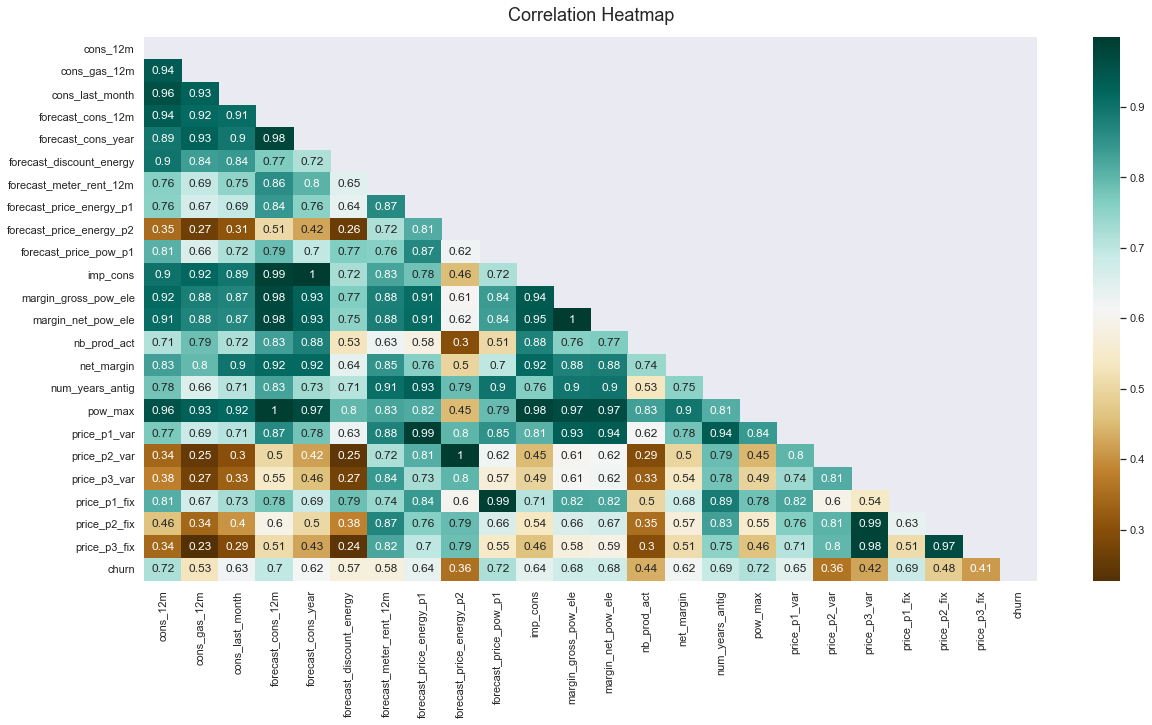

In [29]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot = True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [30]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"): 
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind="bar", stacked=True, figsize=size_, rot=rot_, title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_) # Labels
    plt.ylabel("Company base (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1)) # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad), color=colour,
                size=textsize,
               )
    


### 3.2 Churn

**It is important to note that the data is highly imbalanced as only 10% of the clients churned.**

Text(0.5, 1.0, 'Churning Status')

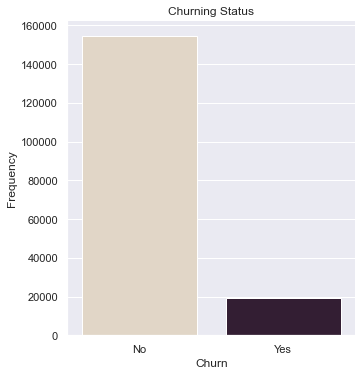

In [31]:
sns.catplot(x="churn", kind="count", palette="ch:.25", data=data)
plt.ylabel('Frequency')
plt.xlabel('Churn')
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Churning Status')

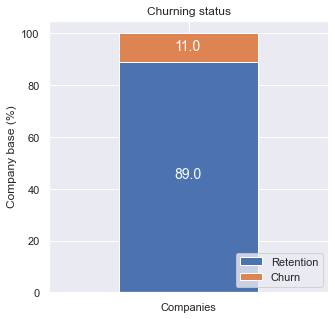

In [32]:
churn = data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn["churn"]).count() 
churn_percentage = round(churn_total/churn_total.sum()*100, 2)

plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")


## SME Activity

### 3.3. Sales channel

**There are 4 sales channels**
We should note that there are 2 sales channels where all the customers therein churned which should be a case of concern.

In [33]:
pd.DataFrame({'Frequency':data['channel_sales'].value_counts()})

,Frequency
foosdfpfkusacimwkcsosbicdxkicaua,131384
lmkebamcaaclubfxadlmueccxoimlema,24861
usilxuppasemubllopkaafesmlibmsdf,17314
sddiedcslfslkckwlfkdpoeeailfpeds,143


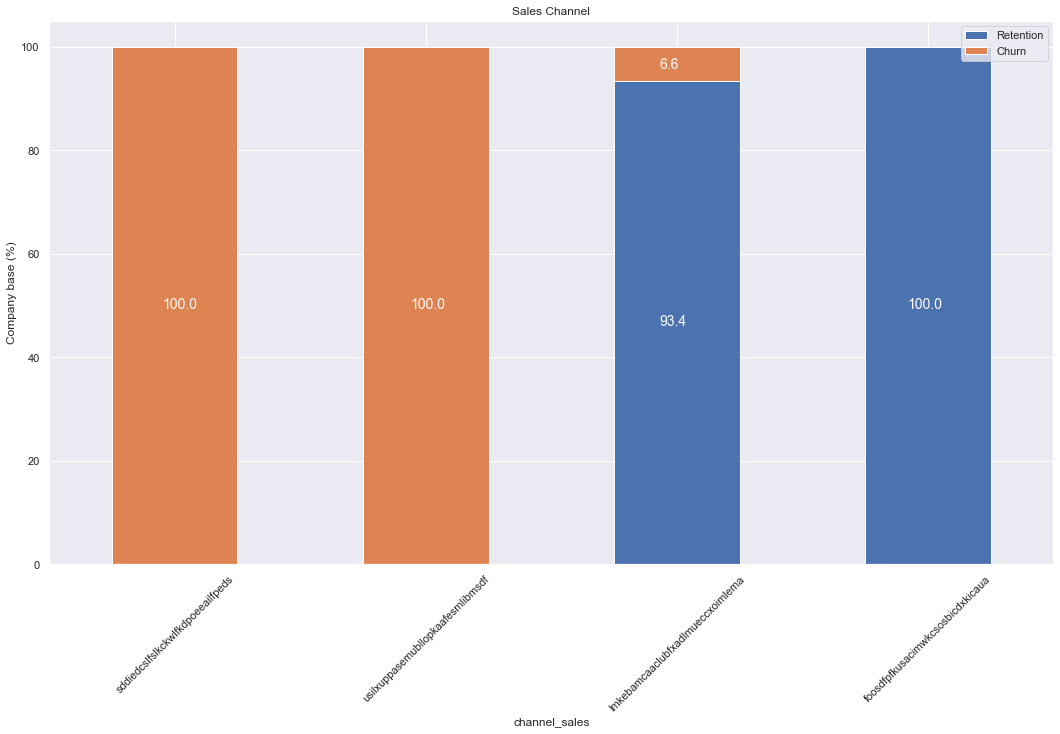

In [34]:
channel = data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel["channel_sales"], channel["churn"]])["id"].count().unstack(level=1)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=45)

### 3.4 Consumption
From the histogram plots, it is evident that the comnsumption variables such as electricity & gas consumption of the past 12 monthsdata is **rightly-skewed** and the boxplot shows there are a lot of outliers to the right.
We may have to standardize the variables to eliminate the effect of the outliers.

In [35]:
consumption = data[["id", "cons_12m", "cons_gas_12m", "cons_last_month","imp_cons", "has_gas", "churn"]]

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                         "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True) # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

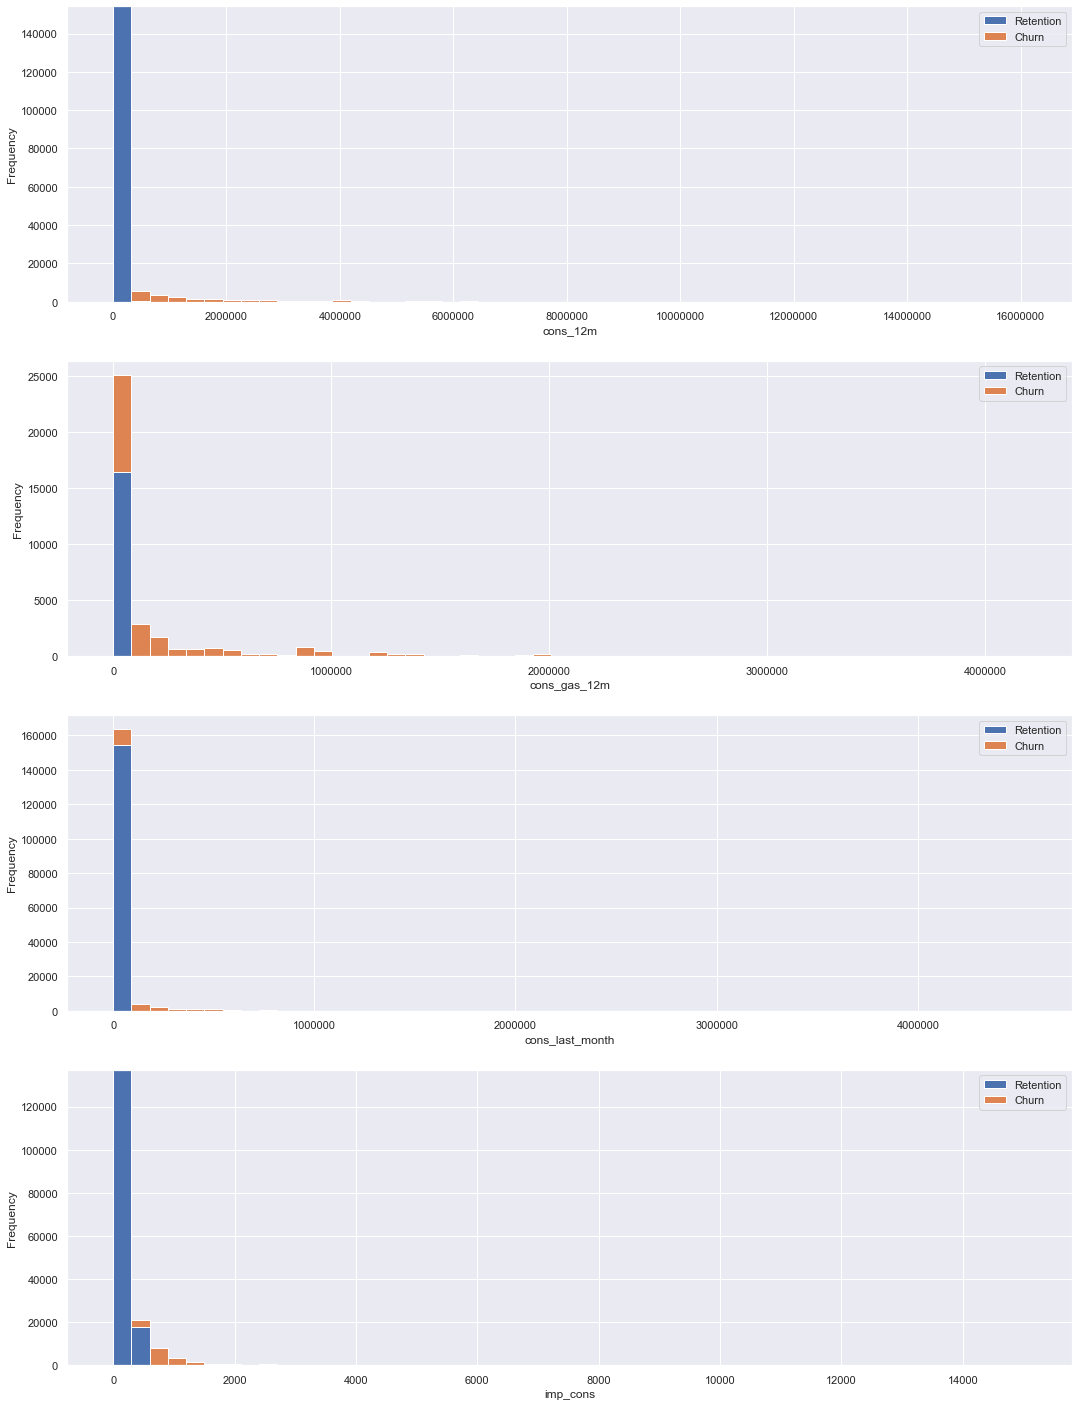

In [36]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"],"cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

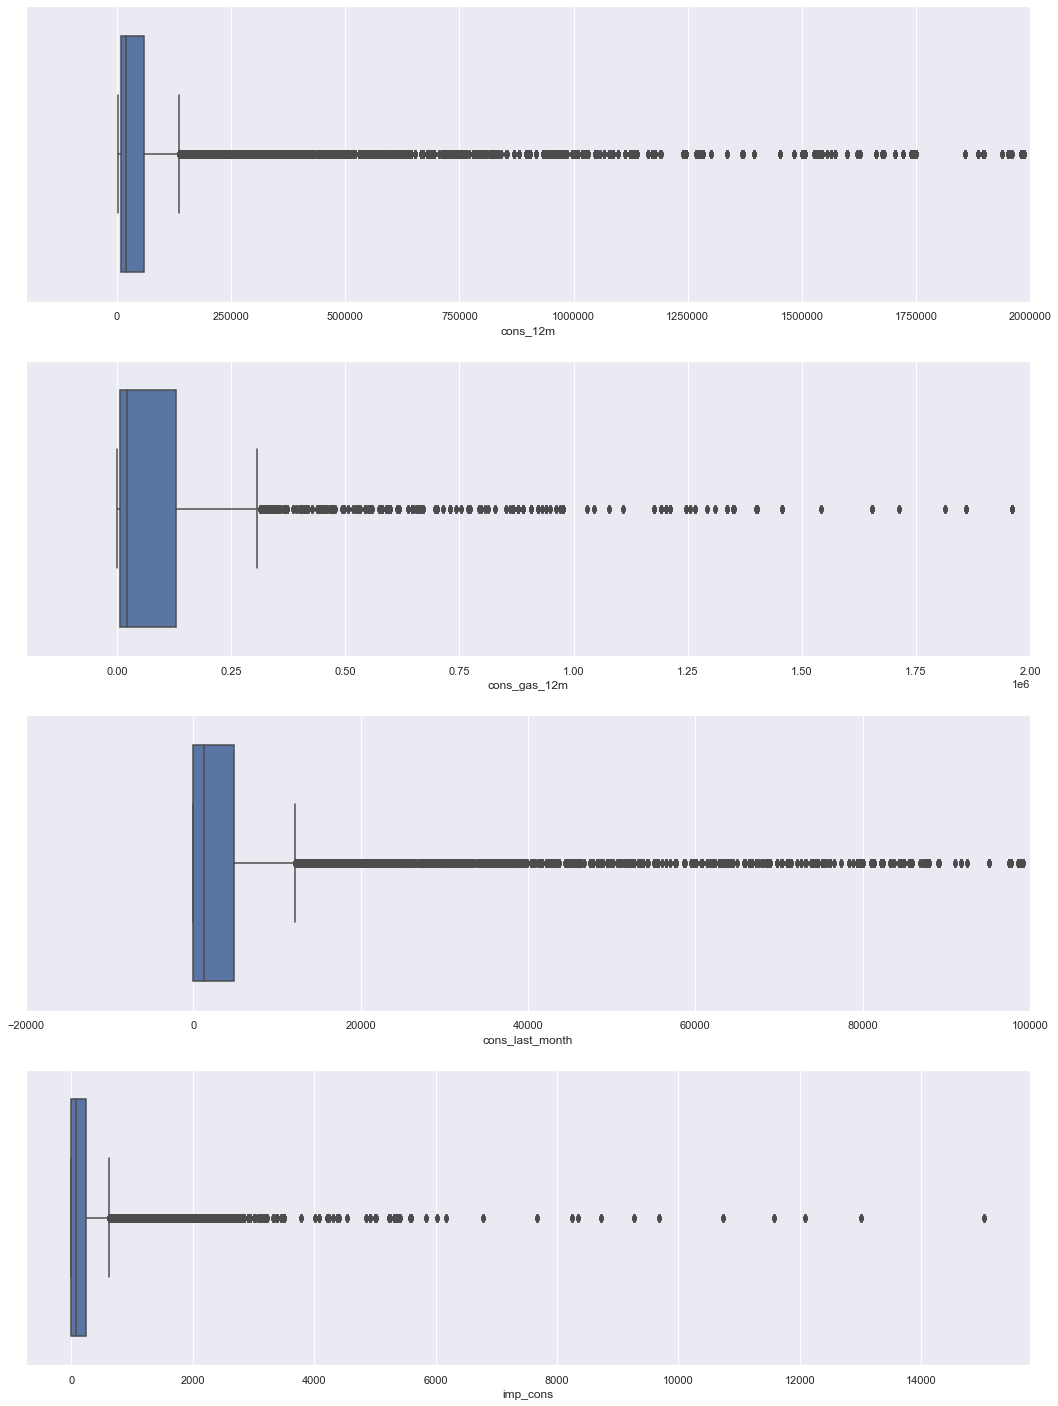

In [37]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

Text(0.5, 1.0, 'Churn status of clients depending on if they are also gas clients')

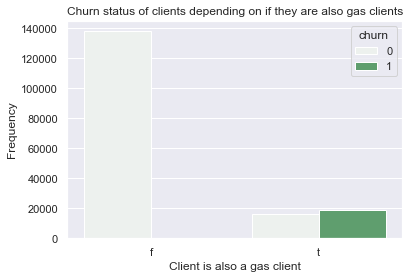

In [38]:
sns.countplot(x="has_gas",hue='churn', data=data, color="g")
plt.xlabel('Client is also a gas client')
plt.ylabel('Frequency')
plt.title('Churn status of clients depending on if they are also gas clients')

It is evident from the above chart that clients who are also gas clients churned at similar rates.

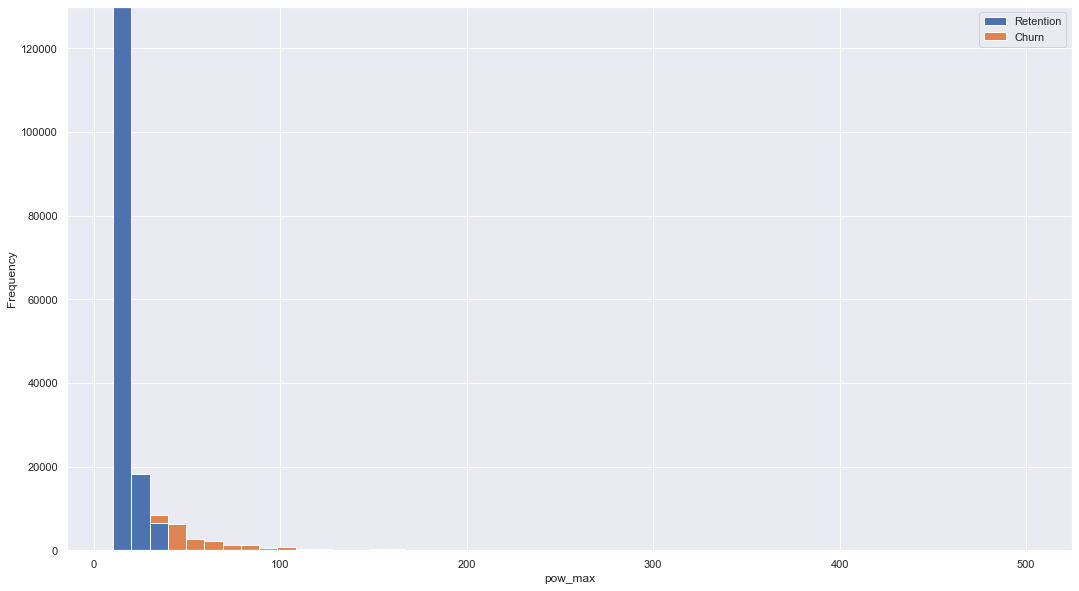

In [39]:
power = data[["id","pow_max", "churn"]]
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

In [40]:
others = data[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

### 3.5 Number of active products and services

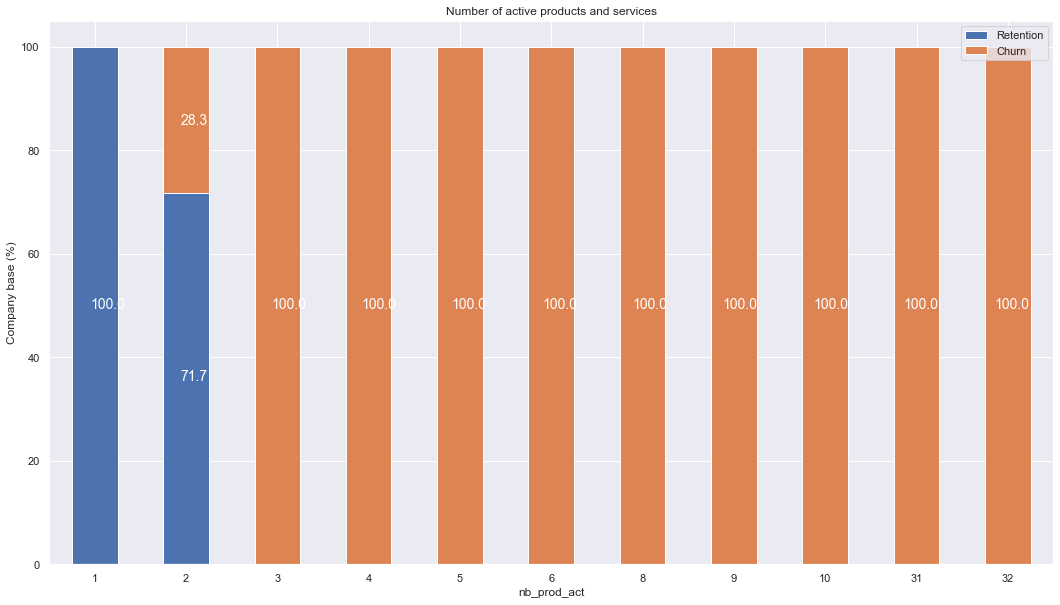

In [41]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[0], ascending=False)
plot_stacked_bars(products_percentage, "Number of active products and services")

### 3.6. Antiquity of the client (in number of years)

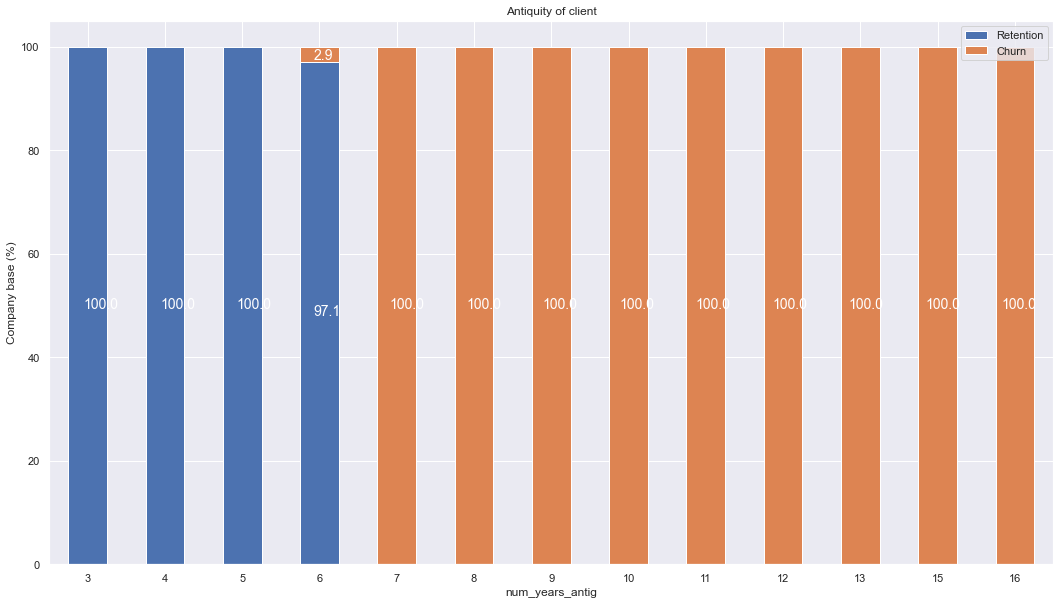

In [42]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Antiquity of client")

### 3.7.  Electricity campaign the customer first subscribed to

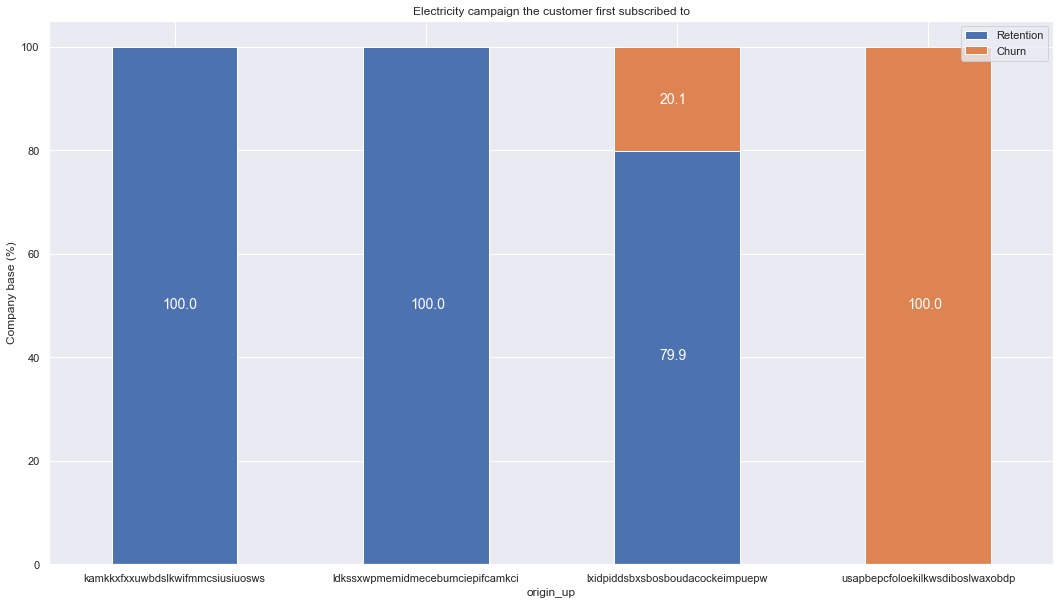

In [43]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Electricity campaign the customer first subscribed to")

### 3.8 Forecast

In [44]:
forecast = data[['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'id', 'churn']]

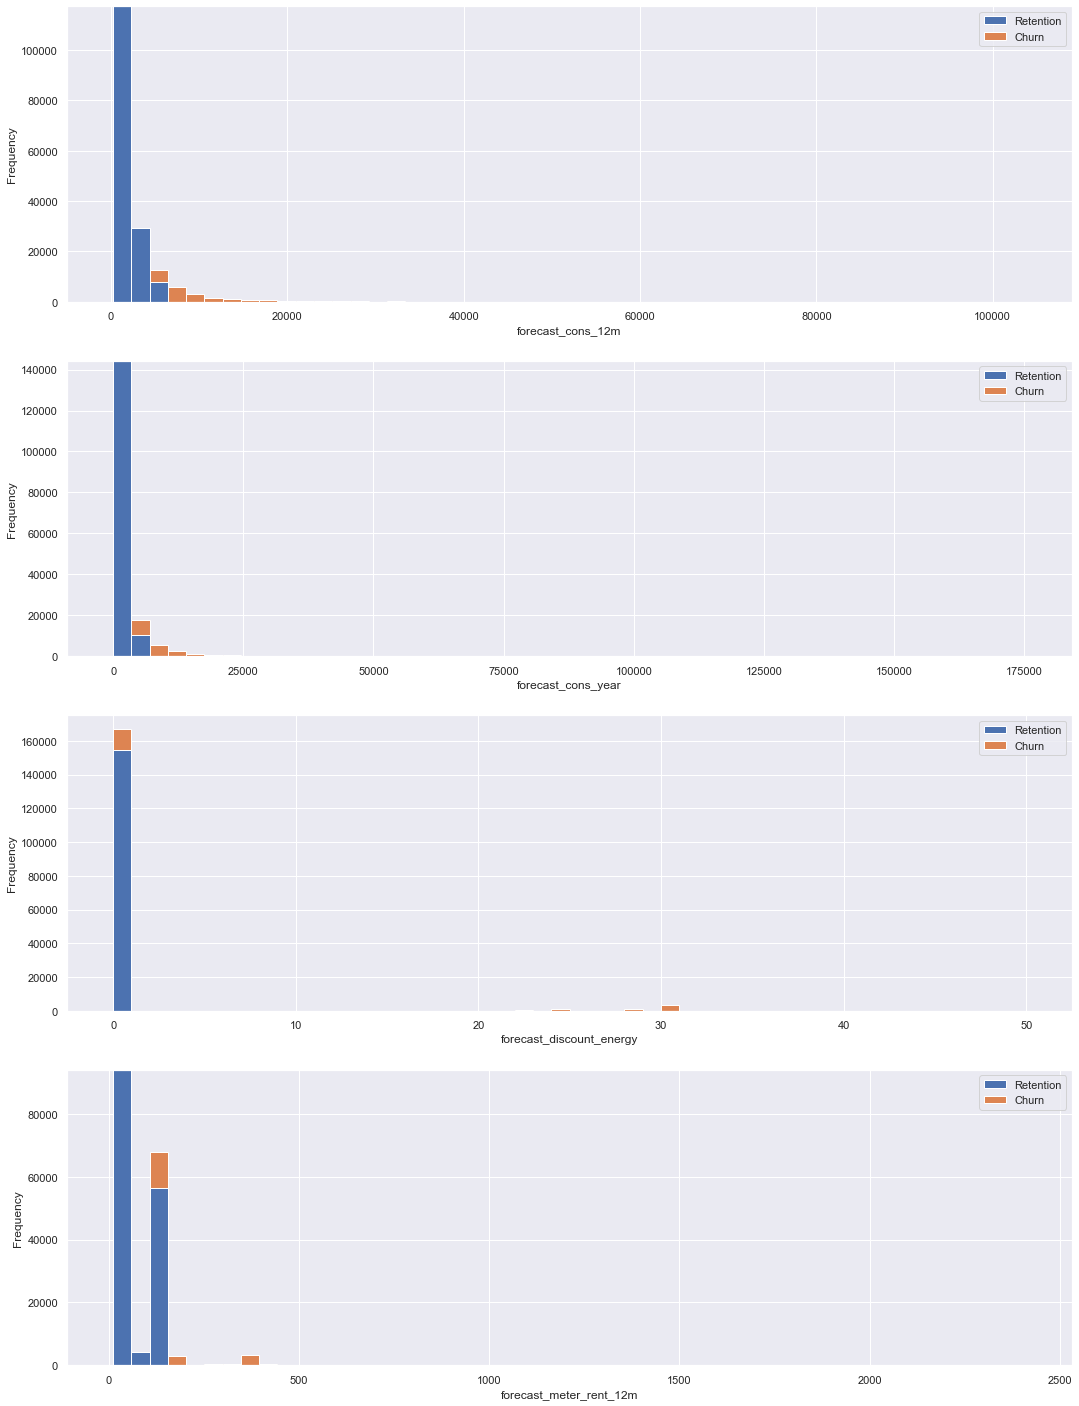

In [45]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(forecast, "forecast_cons_12m", axs[0])
plot_distribution(forecast, "forecast_cons_year", axs[1])
plot_distribution(forecast, "forecast_discount_energy", axs[2])
plot_distribution(forecast, "forecast_meter_rent_12m", axs[3])

### 3.9. Relationships between price of energy and customer churn for the three periods

For the first period, there is a statistically significant difference in the price of energy for churned and retained customers.

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 1st period')

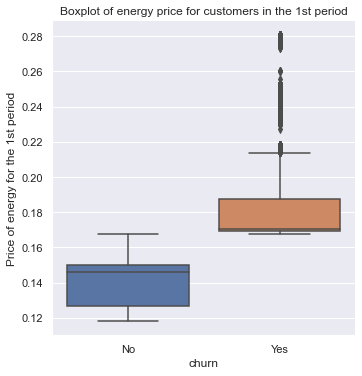

In [46]:
sns.catplot(x="churn", y="price_p1_var", kind="box", data=data)
plt.ylabel('Price of energy for the 1st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 1st period')

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 2nd period')

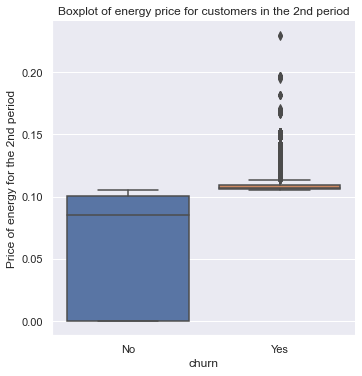

In [47]:
sns.catplot(x="churn", y="price_p2_var", kind="box", data=data)
plt.ylabel('Price of energy for the 2nd period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 2nd period')


Text(0.5, 1.0, 'Boxplot of energy price for customers in the 3rd period')

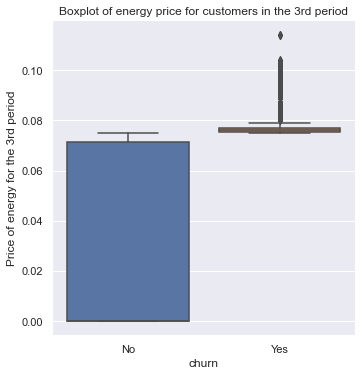

In [48]:
sns.catplot(x="churn", y="price_p3_var", kind="box", data=data)
plt.ylabel('Price of energy for the 3rd period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 3rd period')

### 3.3. Price of power in the first period and customer churn 

Text(0.5, 1.0, 'Boxplot of power price for customers in the 1st period')

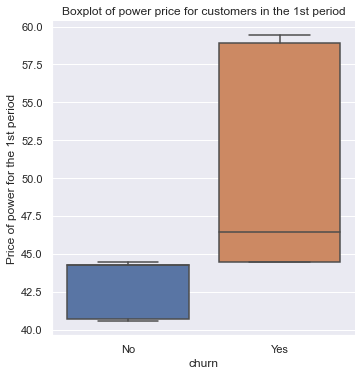

In [49]:
sns.catplot(x="churn", y="price_p1_fix", kind="box", data=data)
plt.ylabel('Price of power for the 1st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of power price for customers in the 1st period')

In [50]:
data.to_csv('processed_data.csv', index=False)